In [12]:
import pandas as pd

# Load your datasets
df_2020 = pd.read_csv('df_2020_preprocessed.csv')  # Replace with actual file path
game_category_data = pd.read_csv('games.csv')  # Replace with actual file path

# Show a quick overview of the data
df_2020.head(), game_category_data.head()


(   Rank                Game  Month  Year  Hours_watched  Hours_streamed  \
 0     1   League of Legends      1  2020       0.288542        0.288241   
 1     2       Just Chatting      1  2020       0.255773        0.137586   
 2     3  Escape From Tarkov      1  2020       0.209226        0.101785   
 3     4            Fortnite      1  2020       0.155118        0.429433   
 4     5              Dota 2      1  2020       0.126920        0.043125   
 
    Peak_viewers  Peak_channels  Streamers  Avg_viewers  Avg_channels  \
 0      0.111762       0.062230   0.316770     0.279203      0.288201   
 1      0.202055       0.022771   0.285762     0.247491      0.137573   
 2      0.091752       0.018282   0.080821     0.202449      0.101748   
 3      0.190417       0.087026   0.670681     0.150091      0.429400   
 4      0.116346       0.008109   0.040845     0.122804      0.043078   
 
    Avg_viewer_ratio  Viewer_Streamer_Ratio  Hours_per_Channel  
 0          0.007442               0.

Step 2: Merge the Datasets
We will merge these datasets on the "Game" column (or whatever common column you have). Ensure both datasets have this column:

In [13]:
# Check column names in both datasets
print(df_2020.columns)
print(game_category_data.columns)


Index(['Rank', 'Game', 'Month', 'Year', 'Hours_watched', 'Hours_streamed',
       'Peak_viewers', 'Peak_channels', 'Streamers', 'Avg_viewers',
       'Avg_channels', 'Avg_viewer_ratio', 'Viewer_Streamer_Ratio',
       'Hours_per_Channel'],
      dtype='object')
Index(['Unnamed: 0', 'Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
       'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist'],
      dtype='object')


In [14]:
# Merge df_2020 with game_category_data based on the 'Game' column in df_2020 and the 'Title' column in game_category_data
df_genre_analysis = pd.merge(
    df_2020[['Game', 'Month', 'Hours_watched']],  # Selecting the necessary columns from df_2020
    game_category_data[['Title', 'Genres']],  # Selecting 'Title' and 'Genres' from game_category_data
    left_on='Game',  # The column in df_2020
    right_on='Title',  # The column in game_category_data
    how='left'
)

# View the merged data
df_genre_analysis.head()



,Game,Month,Hours_watched,Title,Genres
0,League of Legends,1,0.288542,League of Legends,"['MOBA', 'RPG', 'Strategy']"
1,League of Legends,1,0.288542,League of Legends,"['MOBA', 'RPG', 'Strategy']"
2,Just Chatting,1,0.255773,NaN,NaN
3,Escape From Tarkov,1,0.209226,NaN,NaN
4,Fortnite,1,0.155118,Fortnite,"['Adventure', 'RPG', 'Shooter', 'Strategy']"


Step 3: Convert Month to Date
If your Month column contains numeric values (1 for January, 2 for February, etc.), we will convert this column into a proper date format. Here's how to do it

In [15]:
# Assuming 'Month' is numeric (1 to 12)
df_genre_analysis['Date'] = pd.to_datetime(df_genre_analysis['Month'], format='%m', errors='coerce')

# Verify the conversion
df_genre_analysis.head()


,Game,Month,Hours_watched,Title,Genres,Date
0,League of Legends,1,0.288542,League of Legends,"['MOBA', 'RPG', 'Strategy']",1900-01-01
1,League of Legends,1,0.288542,League of Legends,"['MOBA', 'RPG', 'Strategy']",1900-01-01
2,Just Chatting,1,0.255773,NaN,NaN,1900-01-01
3,Escape From Tarkov,1,0.209226,NaN,NaN,1900-01-01
4,Fortnite,1,0.155118,Fortnite,"['Adventure', 'RPG', 'Shooter', 'Strategy']",1900-01-01


If the Month column is in abbreviated or full month names (e.g., "Jan", "Feb"), you can adjust accordingly using:

In [16]:
# # If 'Month' contains full month names (e.g., "January", "February")
# df_genre_analysis['Date'] = pd.to_datetime(df_genre_analysis['Month'], format='%B', errors='coerce')


Step 4: Group the Data
Now that the Date column is correctly formatted, we can group the data by Date and Genres and sum the Hours_watched:

In [17]:
# Group by 'Date' and 'Genres', summing 'Hours_watched'
df_genre_time = df_genre_analysis.groupby(['Date', 'Genres'])['Hours_watched'].sum().reset_index()

# View the grouped data
df_genre_time.head()


,Date,Genres,Hours_watched
0,1900-01-01,"['Adventure', 'Brawler', 'Indie', 'RPG']",0.012173
1,1900-01-01,"['Adventure', 'Brawler', 'RPG']",0.044462
2,1900-01-01,"['Adventure', 'Brawler', 'Strategy']",0.000703
3,1900-01-01,"['Adventure', 'Brawler']",0.022455
4,1900-01-01,"['Adventure', 'Indie', 'Platform', 'RPG', 'Str...",0.001708


Step 5: Create Visualizations
Now, let's create a complex visualization (e.g., a stacked bar chart) to represent the hours watched over time by genre. Here's how to do it:

python
Copy code


/var/folders/vv/3m6pgh0j7tzfwg0700_xtf280000gn/T/ipykernel_71336/429288498.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

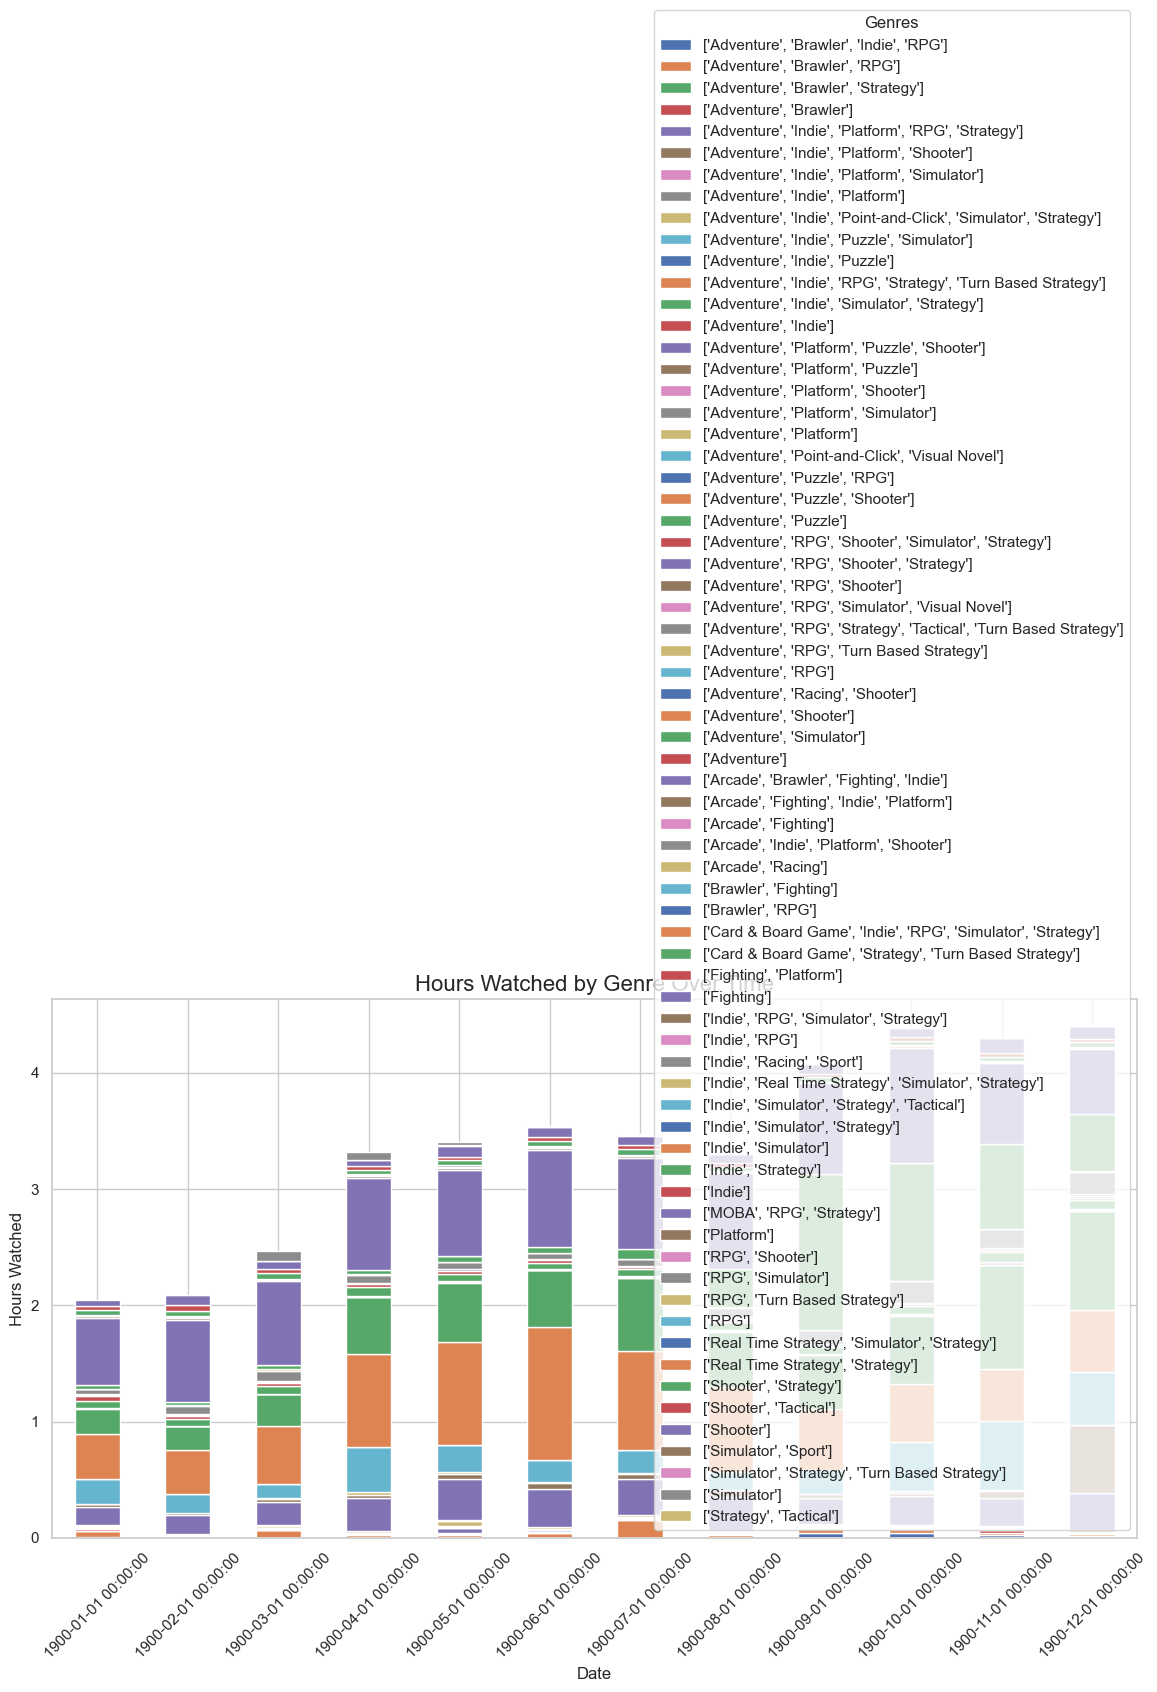

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style
sns.set(style="whitegrid")

# Pivot the data for stacked bar chart
df_pivot = df_genre_time.pivot_table(index='Date', columns='Genres', values='Hours_watched', aggfunc='sum', fill_value=0)

# Plotting the stacked bar chart
plt.figure(figsize=(12, 6))
df_pivot.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.title('Hours Watched by Genre Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Hours Watched', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1. Heatmap: Viewer Count Across Genres and Streamers
A heatmap can show which genres have higher viewer engagement across the top streamers. Here's how to create it:

In [21]:
print(df_genre_analysis.columns)


Index(['Game', 'Month', 'Hours_watched', 'Title', 'Genres', 'Date'], dtype='object')


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check data types and null values
print(df_genre_analysis[['Genres', 'Streamers', 'Avg_viewers']].info())

# Pivot the data to have 'Genres' as rows, 'Streamers' as columns, and 'Avg_viewers' as values
heatmap_data = df_genre_analysis.pivot_table(
    values='Avg_viewers',  # We are interested in average viewers
    index='Genres',  # Rows will be genres
    columns='Streamers',  # Columns will be streamers
    aggfunc='sum',  # Aggregate function (sum viewers)
    fill_value=0  # Fill missing values with 0
)

# Check the resulting heatmap data
print(heatmap_data.head())

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=.5)
plt.title('Heatmap of Viewer Count Across Genres and Streamers')
plt.xlabel('Streamers')
plt.ylabel('Genres')
plt.show()


KeyError: "['Streamers', 'Avg_viewers'] not in index"

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if we need to merge with another dataset for 'Streamers' and 'Avg_viewers'
# (e.g., merge with a dataframe that contains 'Streamers' and 'Avg_viewers' information)

# After merging or adding the missing data columns, you can proceed with the following:

# Handle missing values and genre format
df_genre_analysis_clean = df_genre_analysis.dropna(subset=['Genres'])

# If 'Genres' is stored as a string representation of lists, convert them to actual lists
df_genre_analysis_clean['Genres'] = df_genre_analysis_clean['Genres'].apply(lambda x: x if isinstance(x, list) else eval(x))

# Explode the 'Genres' column to get one genre per row
df_genre_analysis_clean = df_genre_analysis_clean.explode('Genres')

# Pivot the data to have 'Genres' as rows, 'Streamers' as columns, and 'Avg_viewers' as values
heatmap_data = df_genre_analysis_clean.pivot_table(
    values='Avg_viewers',  # We are interested in average viewers
    index='Genres',  # Rows will be genres
    columns='Streamers',  # Columns will be streamers
    aggfunc='sum',  # Aggregate function (sum viewers)
    fill_value=0  # Fill missing values with 0
)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=.5)
plt.title('Heatmap of Viewer Count Across Genres and Streamers')
plt.xlabel('Streamers')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()


/var/folders/vv/3m6pgh0j7tzfwg0700_xtf280000gn/T/ipykernel_71336/1121478506.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre_analysis_clean['Genres'] = df_genre_analysis_clean['Genres'].apply(lambda x: x if isinstance(x, list) else eval(x))


KeyError: 'Avg_viewers'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27115 entries, 0 to 27114
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Game          27115 non-null  object 
 1   Genres        14071 non-null  object 
 2   Avg_viewers   27115 non-null  float64
 3   Avg_channels  27115 non-null  float64
 4   Streamers     27115 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.0+ MB
None


/var/folders/vv/3m6pgh0j7tzfwg0700_xtf280000gn/T/ipykernel_71336/489402917.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



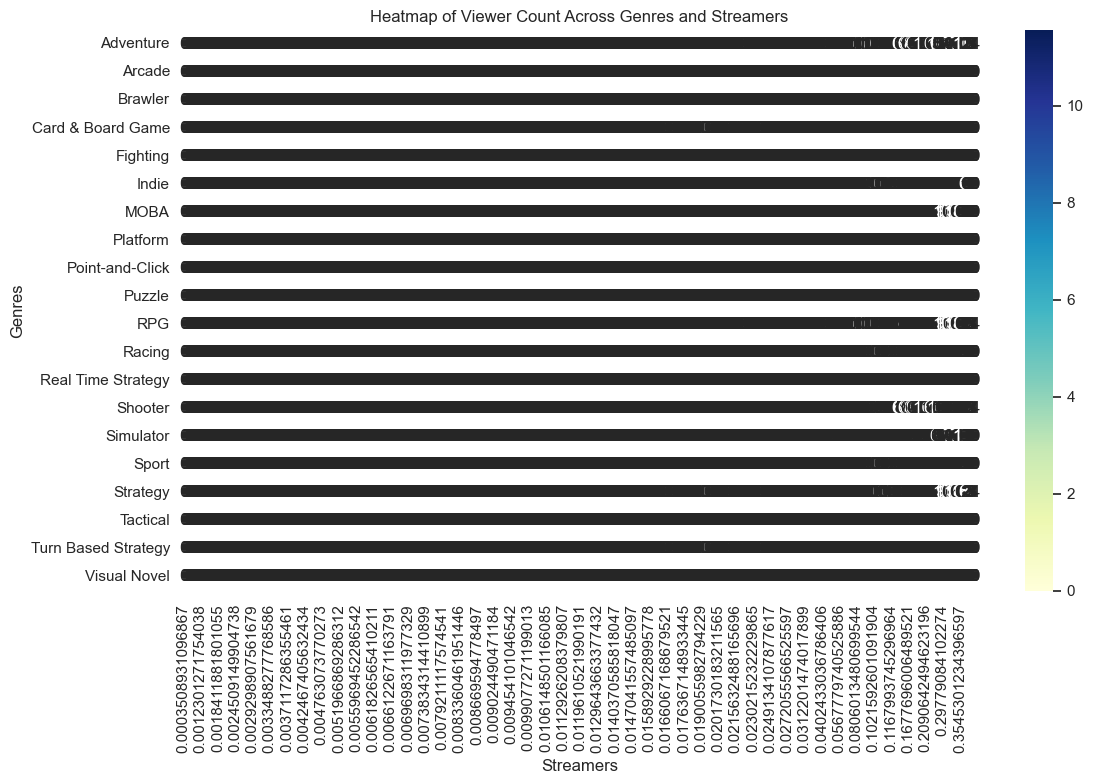

In [27]:
# Merge the dataframes on 'Game' (or another appropriate column) to include columns from df_2020
df_merged = pd.merge(df_genre_analysis, df_2020[['Game', 'Avg_viewers', 'Avg_channels', 'Streamers', 'Hours_watched']], 
                     on='Game', how='left')

# Check if the necessary columns are added
print(df_merged[['Game', 'Genres', 'Avg_viewers', 'Avg_channels', 'Streamers']].info())

# Handle missing values and genre format
df_merged_clean = df_merged.dropna(subset=['Genres'])

# If 'Genres' is stored as a string representation of lists, convert them to actual lists
df_merged_clean['Genres'] = df_merged_clean['Genres'].apply(lambda x: x if isinstance(x, list) else eval(x))

# Explode the 'Genres' column to get one genre per row
df_merged_clean = df_merged_clean.explode('Genres')

# Pivot the data to have 'Genres' as rows, 'Streamers' as columns, and 'Avg_viewers' as values
heatmap_data = df_merged_clean.pivot_table(
    values='Avg_viewers',  # We are interested in average viewers
    index='Genres',  # Rows will be genres
    columns='Streamers',  # Columns will be streamers
    aggfunc='sum',  # Aggregate function (sum viewers)
    fill_value=0  # Fill missing values with 0
)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=.5)
plt.title('Heatmap of Viewer Count Across Genres and Streamers')
plt.xlabel('Streamers')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()


In [32]:
print(df_merged_clean.columns)


Index(['Game', 'Month', 'Hours_watched_x', 'Title', 'Genres', 'Date',
       'Avg_viewers', 'Avg_channels', 'Streamers', 'Hours_watched_y'],
      dtype='object')


2. Bubble Chart: Relationship Between Average Viewers, Streamers, and Hours Watched
A bubble chart can visualize the relationship between these variables by varying the size of the bubbles for Hours_watched:

In [28]:
plt.figure(figsize=(10, 6))

# Create a bubble chart
plt.scatter(
    df_genre_analysis['Avg_viewers'],  # X-axis: average viewers
    df_genre_analysis['Streamers'],  # Y-axis: streamers
    s=df_genre_analysis['Hours_watched'] * 10,  # Size of the bubble: hours watched
    alpha=0.6,  # Transparency of bubbles
    c=df_genre_analysis['Genres'].astype('category').cat.codes,  # Color based on genre
    cmap='viridis'  # Color map
)

plt.title('Bubble Chart: Relationship Between Average Viewers, Streamers, and Hours Watched')
plt.xlabel('Average Viewers')
plt.ylabel('Streamers')
plt.colorbar(label='Genres')  # Add a color bar to represent genres
plt.show()


KeyError: 'Avg_viewers'

<Figure size 1000x600 with 0 Axes>

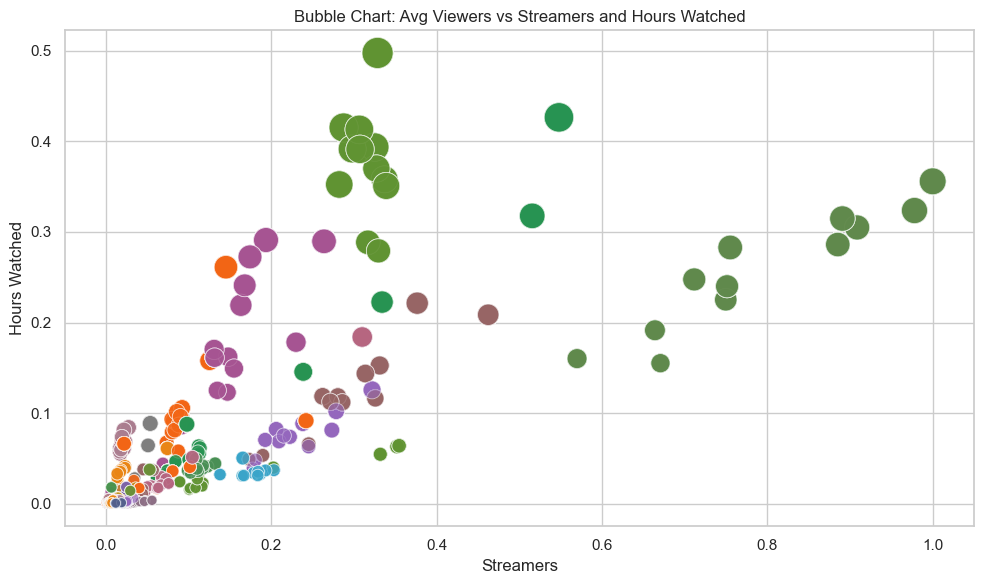

In [33]:
# Bubble Chart: Relationship between average viewers, streamers, and hours watched
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged_clean, 
                x='Streamers', 
                y='Hours_watched_y', 
                size='Avg_viewers', 
                sizes=(50, 500), 
                hue='Genres', 
                palette='tab10', 
                legend=None, 
                alpha=0.6)

plt.title('Bubble Chart: Avg Viewers vs Streamers and Hours Watched')
plt.xlabel('Streamers')
plt.ylabel('Hours Watched')
plt.tight_layout()
plt.show()


3. Treemap: Genre Popularity Based on Total Hours Watched
A treemap can show genre popularity based on the total hours watched.

In [25]:
import plotly.express as px

# Group by 'Genres' and calculate the total 'Hours_watched' for each genre
genre_popularity = df_genre_analysis.groupby('Genres')['Hours_watched'].sum().reset_index()

# Create a treemap plot
fig = px.treemap(
    genre_popularity,
    path=['Genres'],  # Only genre as the path
    values='Hours_watched',  # Size of each box
    title="Genre Popularity Based on Total Hours Watched"
)

fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
import plotly.express as px

# Summing total hours watched for each genre
genre_hours = df_merged_clean.groupby('Genres')['Hours_watched'].sum().reset_index()

# Create the treemap
fig = px.treemap(genre_hours, 
                 path=['Genres'], 
                 values='Hours_watched', 
                 title="Treemap: Genre Popularity Based on Total Hours Watched",
                 color='Hours_watched', 
                 color_continuous_scale='YlGnBu')

fig.update_traces(textinfo="label+value+percent entry", 
                  texttemplate="%{label}<br>%{value} hours<br>%{percentEntry}")
fig.show()


ValueError: Value of 'values' is not the name of a column in 'data_frame'. Expected one of ['Genres', 'Hours_watched_y'] but received: Hours_watched

4. Pairplot: Exploring Relationships Between Twitch Metrics Across Genres
A pairplot is useful to explore pairwise relationships between the features.

In [ ]:
# Create a pairplot of selected metrics across genres
sns.pairplot(
    df_genre_analysis[['Avg_viewers', 'Avg_channels', 'Hours_watched', 'Streamers']],
    hue='Genres',  # Color by genre
    palette='Set2',  # Color palette
    plot_kws={'alpha': 0.6}  # Transparency of points
)

plt.suptitle('Pairplot: Exploring Relationships Between Twitch Metrics Across Genres', y=1.02)
plt.show()


KeyError: "None of [Index(['Avg_viewers', 'Avg_channels', 'Hours_watched_y', 'Streamers'], dtype='object')] are in the [columns]"

KeyError: 'Genres'

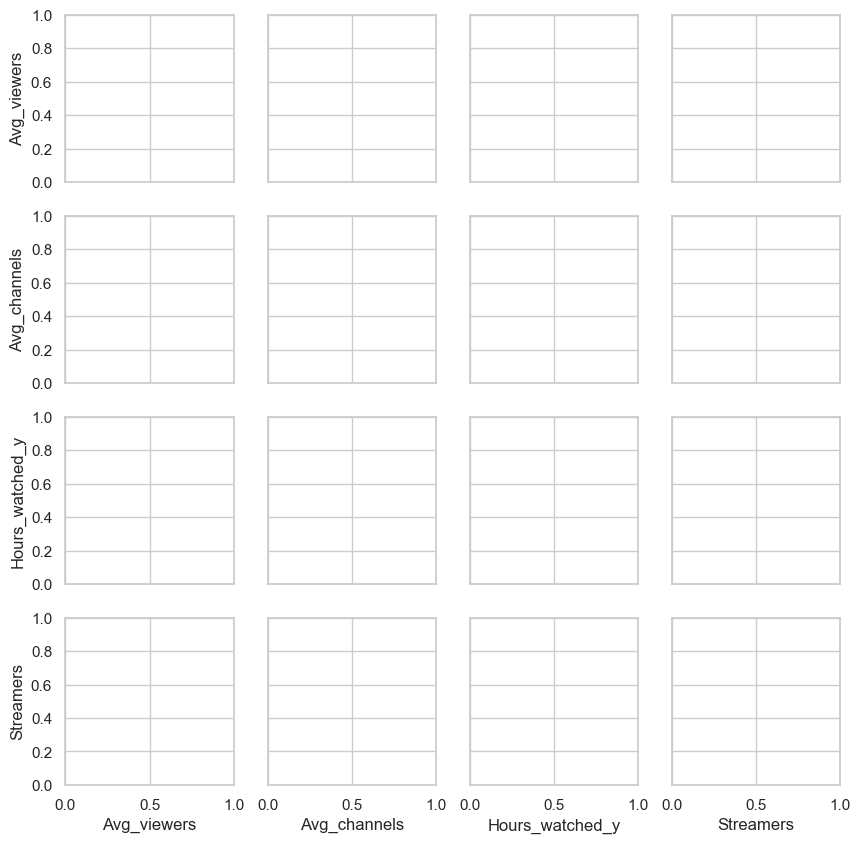

In [36]:
# Pairplot: Exploring relationships between Twitch metrics across genres
sns.pairplot(df_merged_clean[['Avg_viewers', 'Avg_channels', 'Hours_watched_y', 'Streamers']], 
             hue='Genres', 
             palette='tab10', 
             plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot: Exploring Relationships Between Twitch Metrics', size=16)
plt.tight_layout()
plt.show()
